In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy.polynomial import Polynomial as poly
from numpy.polynomial import Chebyshev as C
from scipy import interpolate as ip 
plt.rcParams['figure.figsize'] = [12, 6]

## Funciones


In [3]:
def T(n, a = -1, b = 1):
    '''
    Devuelve el polinomio de Chebyshev de n raíces.
    Se le puede extraer los ceros con T(n).r
    '''
    if n==0:
        return (np.poly1d([1])) 
    if n==1:
        return (np.poly1d([1,0]))
    else:
        return (2*np.poly1d([1,0])* T(n-1) - T(n-2))


def cheb_zeros(n):
    '''
    Devuelve los ceros del Chebyshev de grado n como array de np
    '''
    zeros = np.polynomial.chebyshev.chebpts1(n)
    return np.array(zeros)

def cheb_zeros_plot(n):
    '''
    Devuelve los ceros de Chebyshev y los grafica con su Polinomio
    '''
    x = np.linspace(-1, 1, 200)
    zeros = np.polynomial.chebyshev.chebpts1(n)
    y = np.zeros(n)
    T = np.cos(n * np.arccos(x))
    plt.plot(zeros, y, lw=0, marker='o', ms=10)
    plt.plot(zeros, y, lw=3, color='grey')
    plt.plot(x, T, color='b')
    plt.grid()
    return np.array(zeros)

def domain_change(zeros, x_min, x_max):
    ''' Devuelve el array de zeros trasladado al nuevo dominio. zeros debe ser un np.array.
    Se puede usar directamente con np.polynomial.chebyshev.chebpts1(n) '''
    return x_min + (zeros + 1) * (x_max - x_min) / 2

## Ejercicio 1


### a) 


#### i )


$$ 
f_{1}(x) = e^{2x} 
$$

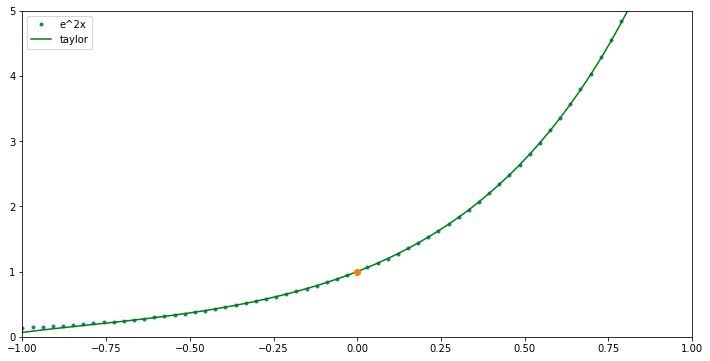

In [ ]:
x = np.linspace(-1, 2, 100)
e_x = np.e**(2*x)
taylor = 1 +2*x+ 2*(x**2) + (4/3)*(x**3) + (2/3)*(x**4) + (4/15)*(x**5)

plt.plot(x, e_x, '.', label='e^2x')
plt.plot(x, taylor, 'g', label='taylor')
plt.plot(0,1, 'o')
plt.xlim(-1, 1)
plt.ylim(0, 5)
plt.legend()

#### ii )

[]

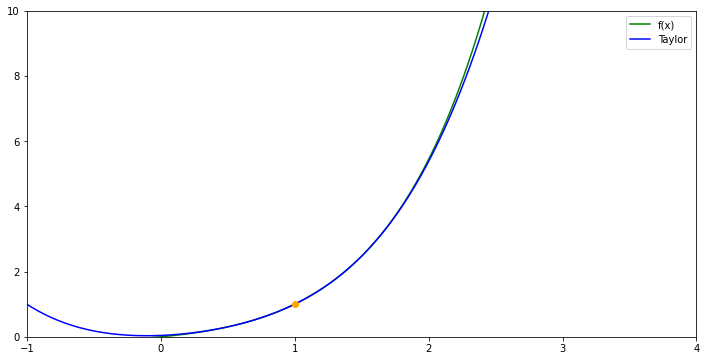

In [ ]:
x = np.linspace(-1, 4, 300)
f = x * np.e**(x-1)
P_4 = 1 + 2*(x-1) + 3/2 *(x-1)**2 + 2/3 * (x-1)**3 + 5/24 *(x-1)**4

plt.plot(x, f, 'g', label='f(x)')
plt.plot(x, P_4, 'b', label='Taylor')
plt.plot(1, 1,marker='o', color='orange')
plt.ylim(0, 10)
plt.xlim(-1, 4)
plt.legend()
plt.plot()

#### iii )

[]

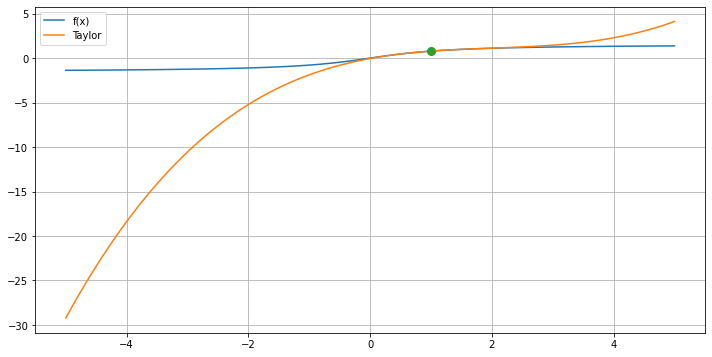

In [ ]:
x = np.linspace(-5, 5, 100)
f = np.arctan(x)
P3 = np.pi/4 + 1/2 *(x-1) - 1/4 * (x-1)**2 + 1/12 * (x-1)**3

plt.plot(x, f, label='f(x)')
plt.plot(x, P3, label = 'Taylor')
plt.plot(1, np.pi/4, marker='o', markersize=8)
plt.grid()
plt.legend()
plt.plot()


### b)
#### i)

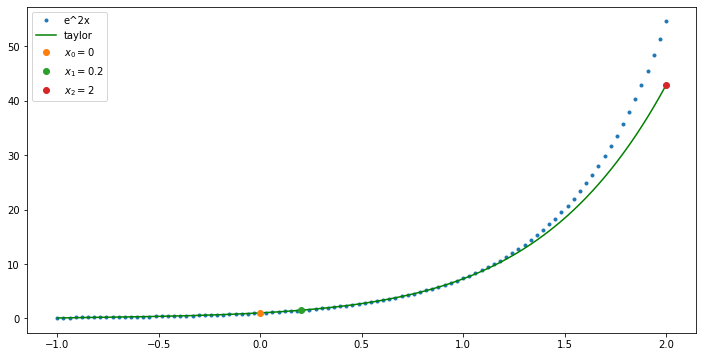

In [ ]:
x = np.linspace(-1, 2, 100)
e_x = np.e**(2*x)
P5 = 1 +2*x+ 2*(x**2) + (4/3)*(x**3) + (2/3)*(x**4) + (4/15)*(x**5)
P5_02 = 1 +2*.2+ 2*(.2**2) + (4/3)*(.2**3) + (2/3)*(.2**4) + (4/15)*(.2**5)
P5_2 = 1 +2*2+ 2*(2**2) + (4/3)*(2**3) + (2/3)*(2**4) + (4/15)*(2**5)

plt.plot(x, e_x, '.', label='e^2x')
plt.plot(x, P5, 'g', label='taylor')
plt.plot(0,1, 'o', label=r"$x_{0}=0$")
plt.plot(0.2, P5_02, 'o', label=r"$x_{1}=0.2$")
plt.plot(2, P5_2, 'o', label=r"$x_{2}=2$")
#plt.xlim(-1, 1)
#plt.ylim(0, 5)
plt.legend()

#### ii )

[]

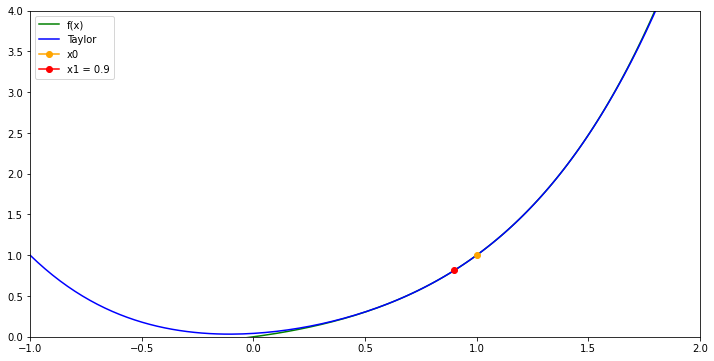

In [ ]:
x = np.linspace(-1, 4, 300)
f = x * np.e**(x-1)
P4 = 1 + 2*(x-1) + 3/2 *(x-1)**2 + 2/3 * (x-1)**3 + 5/24 *(x-1)**4
P4_09 =  1 + 2*(.9-1) + 3/2 *(.9-1)**2 + 2/3 * (.9-1)**3 + 5/24 *(.9-1)**4

plt.plot(x, f, 'g', label='f(x)')
plt.plot(x, P4, 'b', label='Taylor')
plt.plot(1, 1,marker='o', color='orange', label = "x0")
plt.plot(.9, P4_09,marker='o', color='red', label = "x1 = 0.9")
plt.ylim(0, 4)
plt.xlim(-1, 2)
plt.legend()
plt.plot()

[]

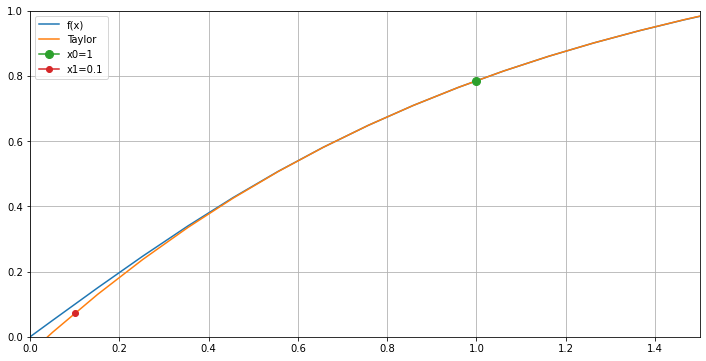

In [ ]:
x = np.linspace(-5, 5, 100)
f = np.arctan(x)
P3 = np.pi/4 + 1/2 *(x-1) - 1/4 * (x-1)**2 + 1/12 * (x-1)**3
P3_01 = np.pi/4 + 1/2 *(.1-1) - 1/4 * (.1-1)**2 + 1/12 * (.1-1)**3

plt.plot(x, f, label='f(x)')
plt.plot(x, P3, label = 'Taylor')
plt.plot(1, np.pi/4, marker='o', markersize=8, label="x0=1")
plt.plot(.1, P3_01, marker="o", label="x1=0.1")
plt.xlim(0, 1.5)
plt.ylim(0, 1)
plt.grid()
plt.legend()
plt.plot()


## Ejercicio 3
### b)
#### ii ) (Calculos aux.)

In [ ]:
def f(x):
    return 1/(x-3)

def deriv_orden_n(n, x):
    d = max(abs((math.factorial(n)*(-1)**n) * (x-3)**(n+1)))
    return d

x = np.linspace(0, 2, 50)

print(deriv_orden_n(3, np.array([1, 2])))

96


## Ejercicio 4


a ) 

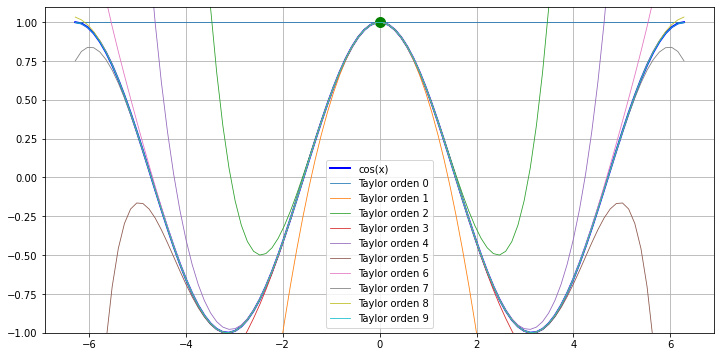

In [ ]:
def f(x):
    return np.cos(x)

def taylor(x, n):
    sum = 0
    for k in range (0, n + 1):
        sum += (-1)**k * x**(2*k) * 1/math.factorial(2*k)
    return sum

x = np.linspace(-2 * np.pi, 2 * np.pi, 100)

plt.plot(x, f(x), label= 'cos(x)', color='blue', linewidth = 2)
plt.plot(0, f(0), 'go', ms=10)
for each in range (0, 10):
    plt.plot(x, taylor(x, each), linewidth = .8, label = 'Taylor orden ' + str(each))

plt.grid(lw=.8)
plt.ylim(-1, 1.1)
plt.legend()

### b)

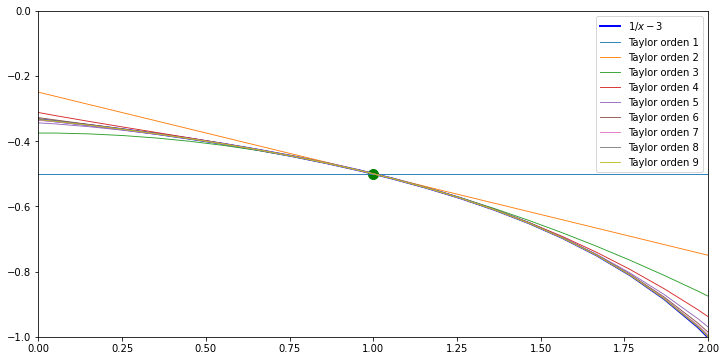

In [ ]:
def f(x):
    return 1/(x-3)

def taylor(x, n):
    sum = 0
    for k in range (1, n + 1):
        sum += -(1/2)**k * (x-1)**(k-1)
    return sum

x = np.linspace(-5, 5, 100)

plt.plot(x, f(x), label= '${1}/{x-3}$', color='blue', linewidth = 2)
plt.plot(1, f(1), marker='o', ms=10, color='green')

for each in range (1, 10):
    plt.plot(x, taylor(x, each), linewidth = .9
    , label = 'Taylor orden ' + str(each))

plt.ylim(-1, 0)
plt.xlim(0,2)
plt.legend()

### c)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


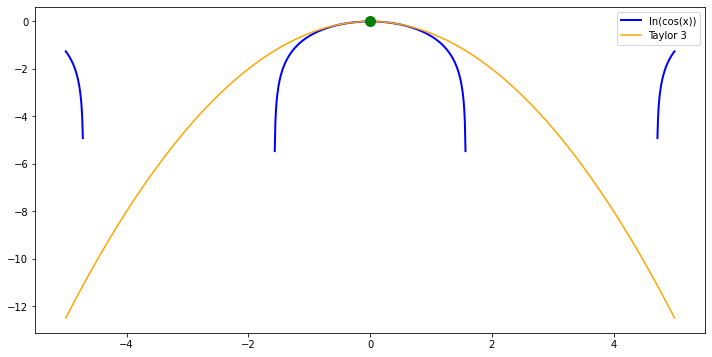

In [ ]:
def f(x):
    return np.log(np.cos(x))

def taylor(x):
    return -1/2 *x**2

x = np.linspace(-5, 5, 1000)

plt.plot(x, f(x), label= 'ln(cos(x))', color='blue', linewidth = 2)
plt.plot(x, taylor(x), color='orange', linewidth = 1.5, label = 'Taylor 3')
plt.plot(0, f(0), marker='o', ms=10, color='green')
plt.legend()

## Ejercicio 7
### i )

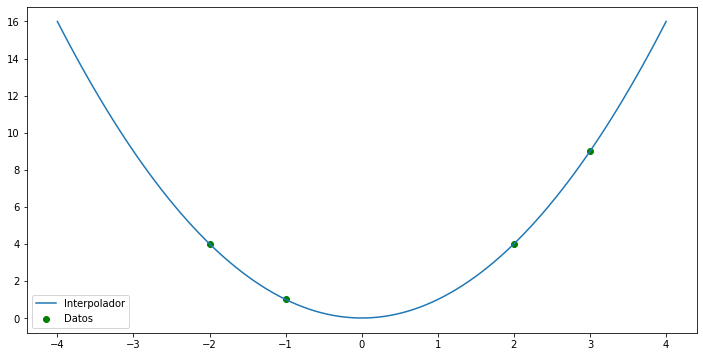

In [ ]:
x = np.array([-2, -1, 2, 3])
y = np.array([4, 1, 4, 9])

x_plot = np.linspace(-4, 4, 100)

p = np.poly1d(np.polyfit(x, y, 3))

plt.plot(x_plot, p(x_plot), label='Interpolador')
plt.scatter(x, y, marker='o', label='Datos', color='green')
plt.legend()

### ii )

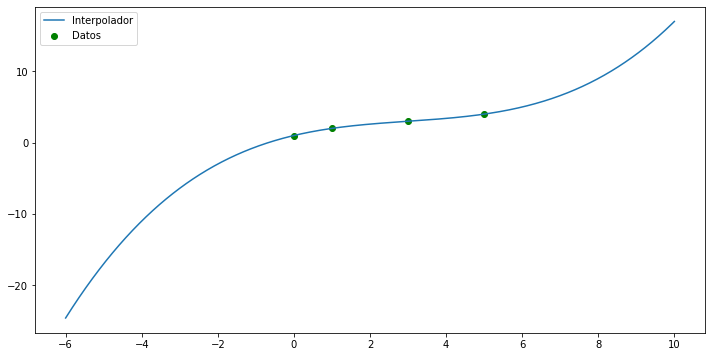

In [ ]:
x = np.array([0, 1, 3, 5])
y = np.array([1, 2, 3, 4])

x_plot = np.linspace(-6, 10, 1000)

p = np.poly1d(np.polyfit(x, y, 3))

plt.plot(x_plot, p(x_plot), label='Interpolador')
plt.scatter(x, y, marker='o', label='Datos', color='green')
plt.legend()

## Ejercicio 8 

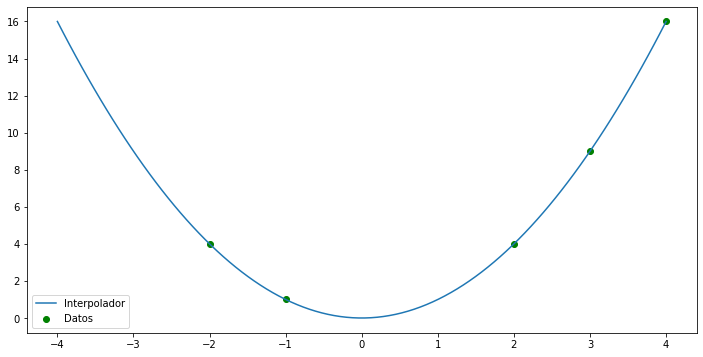

In [ ]:
x = np.array([-2, -1, 2, 3, 4])
y = np.array([4, 1, 4, 9, 16])

x_plot = np.linspace(-4, 4, 100)

p = np.poly1d(np.polyfit(x, y, 4))

plt.plot(x_plot, p(x_plot), label='Interpolador')
plt.scatter(x, y, marker='o', label='Datos', color='green')
plt.legend()

### ii )

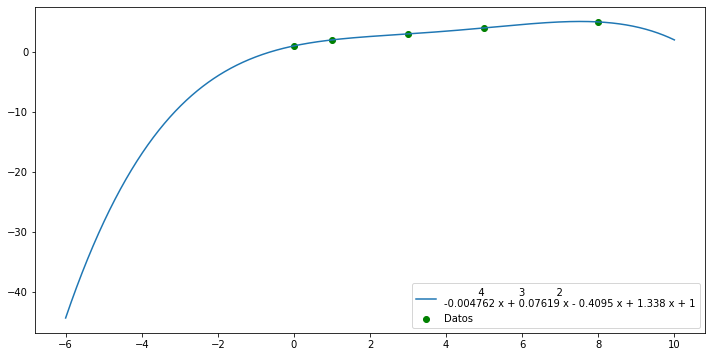

In [ ]:
x = np.array([0, 1, 3, 5, 8])
y = np.array([1, 2, 3, 4, 5])

x_plot = np.linspace(-6, 10, 1000)

p = np.poly1d(np.polyfit(x, y, 4))

plt.plot(x_plot, p(x_plot), label=p)
plt.scatter(x, y, marker='o', label='Datos', color='green')
plt.legend()

## Ejercicio 9

### a)

Error máximo para  2 puntos:  0.21042555020586917
Error máximo para  3 puntos:  0.023536754342482424
Error máximo para  4 puntos:  0.002392593584789493
Error máximo para  7 puntos:  1.1926035309861582e-06


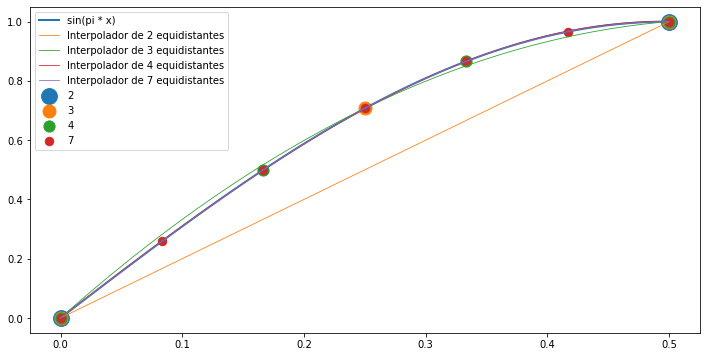

In [ ]:
def f(x):
    return np.sin(np.pi * x)

x_plot = np.linspace(0, 0.5, 50)
plt.plot(x_plot, f(x_plot), label='sin(pi * x)', lw=2)

for n in [1, 2, 3, 6]:
    x = np.linspace(0, .5, n+1)
    y = f(x)
    p = np.poly1d(np.polyfit(x, y, n))
    y_plot = p(x_plot)
    plt.scatter(x, p(x), marker='o', label=str(n+1), s=500/(n+1))
    plt.plot(x_plot, y_plot, label='Interpolador de '+str(n+1)+' equidistantes', lw=.8)
    error = max(abs(p(x_plot)-f(x_plot)))
    print('Error máximo para ', n+1, 'puntos: ', error)

plt.legend()

### b)

Error máximo para  6 puntos:  0.43164545553754474
Error máximo para  11 puntos:  1.9026934657047379
Error máximo para  16 puntos:  2.0975261102751745


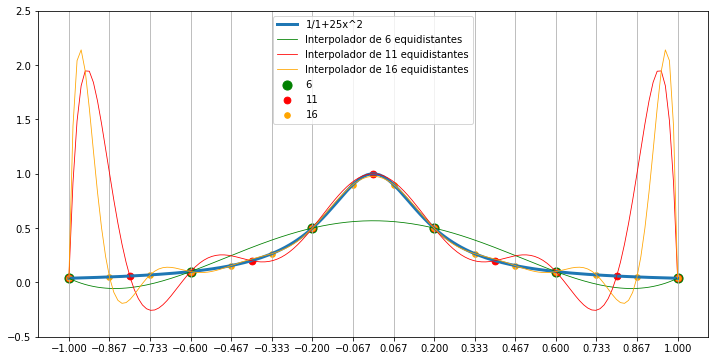

In [ ]:
def f(x):
    return 1/(1 + 25*x**2)

x_plot = np.linspace(-1, 1, 150)
plt.plot(x_plot, f(x_plot), label='1/1+25x^2', lw=3)
plt.ylim(-.5, 2.5)
for n in [5, 10, 15]:
    if n==5:
        color = 'g'
    elif n==10:
        color= 'r'
    else:
        color='orange'
    x = np.linspace(-1, 1, n+1)
    y = f(x)
    p = np.poly1d(np.polyfit(x, y, n))
    y_plot = p(x_plot)
    plt.scatter(x, p(x), color= color, marker='o', label=str(n+1), s=500/(n+1))
    plt.plot(x_plot, y_plot, color=color, label='Interpolador de '+str(n+1)+' equidistantes', lw=.8)
    error = max(abs(p(x_plot)-f(x_plot)))
    print('Error máximo para ', n+1, 'puntos: ', error)

plt.xticks(np.linspace(-1, 1, 16))
plt.grid(axis='x')
plt.legend()

### c)

Error máximo para  3 puntos:  0.5929283163019948
Error máximo para  10 puntos:  0.2216969202806461
Error máximo para  12 puntos:  0.3056778539685382
Error máximo para  14 puntos:  0.43312749952843105


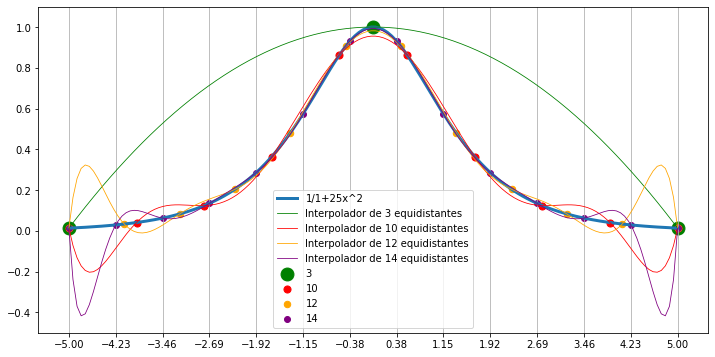

In [ ]:
def f(x):
    return 1/np.cosh(x)

x_plot = np.linspace(-5,5, 150)
plt.plot(x_plot, f(x_plot), label='1/1+25x^2', lw=3)
plt.ylim(-.5, 1.1)
for n in [2, 9, 11, 13]:
    if n==2:
        color = 'g'
    elif n==9:
        color= 'r'
    elif n==11:
        color='orange'
    else:
        color='purple'

    x = np.linspace(-5, 5, n+1)
    y = f(x)
    p = np.poly1d(np.polyfit(x, y, n))
    y_plot = p(x_plot)
    plt.scatter(x, p(x), color= color, marker='o', label=str(n+1), s=500/(n+1))
    plt.plot(x_plot, y_plot, color=color, label='Interpolador de '+str(n+1)+' equidistantes', lw=.8)
    error = max(abs(p(x_plot)-f(x_plot)))
    print('Error máximo para ', n+1, 'puntos: ', error)

plt.xticks(np.linspace(-5, 5, 14))
plt.grid(axis='x')
plt.legend()

## Ejercicio 10

In [ ]:
# Getting f(x)  
x_data = np.array([-2, -1, 0, 1])
y_data = np.array([1, 4, 1/4, 16])
log_data = np.array([0, 1, -1, 2])
p = np.poly1d(np.polyfit(x_data, log_data, 3))
print(p)

       3       2
1.333 x + 2.5 x - 0.8333 x - 1


[-2 -1  0  1] [ 1.    4.    0.25 16.  ]


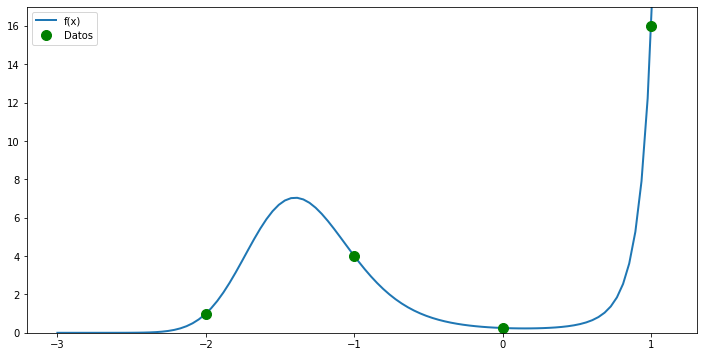

In [ ]:
def f(x):
    return 4**(((4/3)*x**3)+((15/6)*x**2)-((5/6)*x)-1)

x_val = np.array([-2, -1, 0, 1])
y_val = np.array([1, 4, .25, 16])
x = np.linspace(-3, 1.1, 100)
plt.plot(x, f(x), lw=2, label='f(x)')
plt.plot(x_val, y_val, 'o', label='Datos', ms=10, color='green')
print(x_val, y_val)
plt.ylim(0, 17)
plt.legend()

## Ejercicio 11

In [ ]:
def f(x):
    return 1/x

x_data = np.linspace(1, 10, 5) # obtengo f(x) para cada x equid. y lo uso como dato para interpolar
y_data = f(x_data)
log_data = np.log(y_data)
p = np.poly1d(np.polyfit(x_data, log_data, 4)) # interpolador sin elevar
print(p)


           4           3          2
0.0006086 x - 0.01752 x + 0.1936 x - 1.117 x + 0.9404


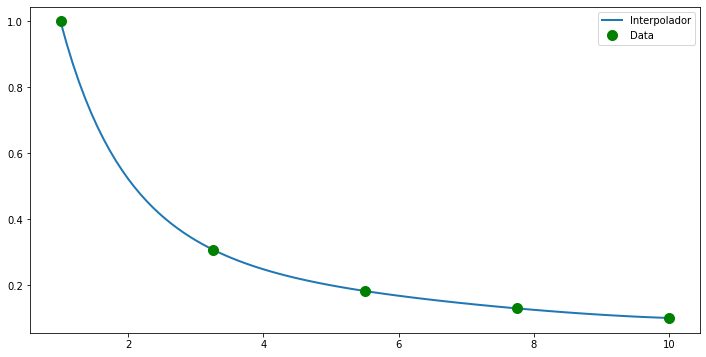

In [ ]:
def g(x):
    return np.e**((0.0006086*x**4)-(0.01752*x**3)+(0.1936*x**2)-(1.117*x)+0.9404)


x_plot = np.linspace(1, 10, 100)
plt.plot(x_plot, g(x_plot), label= 'Interpolador', lw=2)
plt.plot(x_data, y_data, lw=0, marker='o', ms=10, label='Data', color='g')
plt.legend()

## Ejercicio 12

           6             5           4         3         2
1.222e-08 x - 1.382e-05 x + 0.00649 x - 1.618 x + 226.1 x - 1.678e+04 x + 5.166e+05


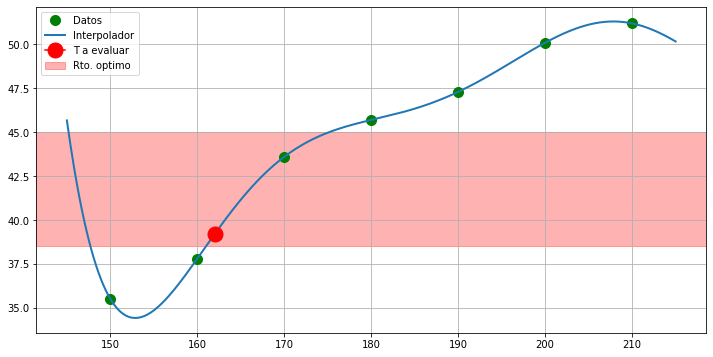

In [ ]:
temp = np.array([150, 160, 170, 180, 190, 200, 210]) # eval a 162
rto = np.array([35.5, 37.8, 43.6, 45.7, 47.3, 50.1, 51.2]) # rto optimo entre 38.5 y 45 %

p = np.poly1d(np.polyfit(temp, rto, len(temp)-1))
x_plot = np.linspace(145, 215, 500)
print(p)

plt.plot(temp, rto, color='green', marker='o', ms=10, lw=0, label='Datos')
plt.plot(x_plot, p(x_plot), lw=2, label='Interpolador')
plt.plot(162, p(162),label='T a evaluar', ms=15, color='r', marker='o')
plt.axhspan(38.5, 45, label='Rto. optimo', alpha=.3, color='red')
plt.grid()
plt.legend()

## Ejercicio 13 

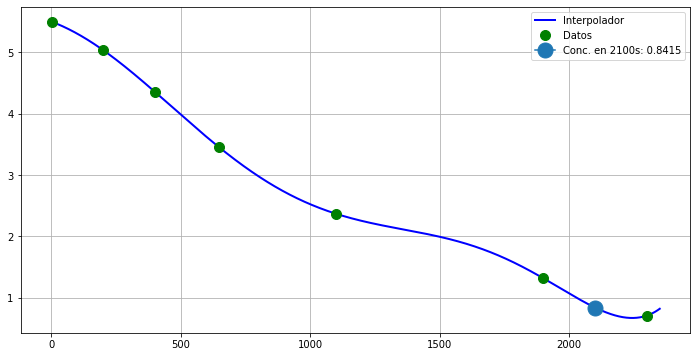

In [ ]:
time = np.array([2, 200, 400, 650, 1100, 1900, 2300])
conc = np.array([5.5, 5.04, 4.36, 3.45, 2.37, 1.32, .71])

p = poly.fit(time, conc, 6)

x_plot = np.linspace(0, 2350, 5000)
plt.plot(x_plot, p(x_plot), label='Interpolador', lw=2, color='blue')
plt.plot(time, conc, label='Datos', lw=0, marker='o', ms=10, color='green')
plt.plot(2100, p(2100), label='Conc. en 2100s: '+str(round(p(2100), 4)), marker='o', ms=15)
plt.legend()
plt.grid()

## Ejercicio 14


### a)

https://notes.quantecon.org/submission/5f6a23677312a0001658ee16
https://numpy.org/doc/stable/reference/generated/numpy.polynomial.chebyshev.chebpts1.html

array([-9.89821442e-01, -9.09631995e-01, -7.55749574e-01, -5.40640817e-01,
       -2.81732557e-01,  6.12323400e-17,  2.81732557e-01,  5.40640817e-01,
        7.55749574e-01,  9.09631995e-01,  9.89821442e-01])

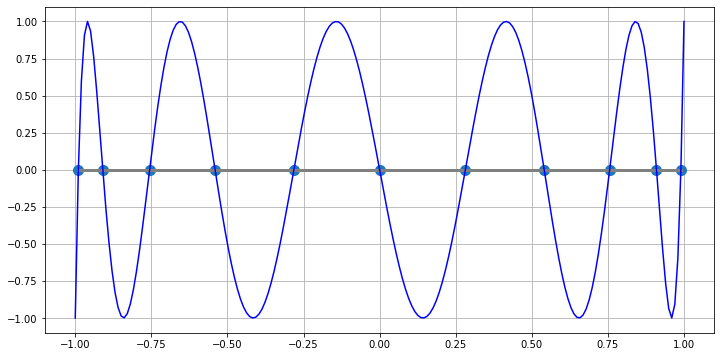

In [ ]:
cheb_zeros(11)

n = 6 error:  0.004223202949199312


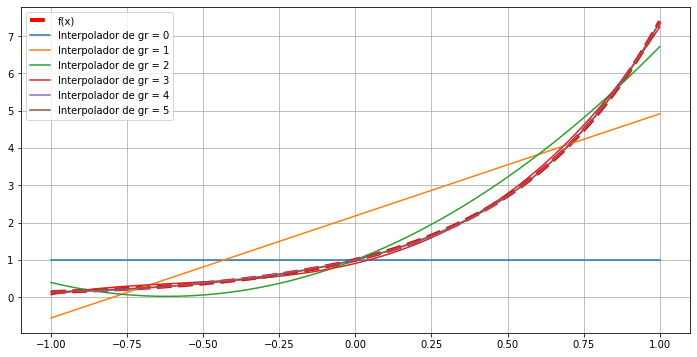

In [ ]:
def f(x):
    return np.e**(2*x)

x_plot = np.linspace(-1, 1, 1000)
plt.plot(x_plot, f(x_plot), 'r--', label='f(x)', lw=4)

for n in range(1, 15):
    zeros = cheb_zeros(n)  #n ceros de chebyshev
    interpolador = np.poly1d(np.polyfit(zeros, f(zeros), n-1))
    error = max(abs(f(x_plot)-interpolador(x_plot)))
    plt.plot(x_plot, interpolador(x_plot), label = 'Interpolador de gr = '+str(n-1))
    if error <= 10**(-2):
        print('n =', n, 'error: ', error)
        break

plt.grid()
plt.legend()

### b)

In [ ]:
t = domain_change(cheb.chebpts1(5), 0, 4)
print(t)

[0.09788697 0.8244295  2.         3.1755705  3.90211303]


n = 7 error:  0.004238199562088596


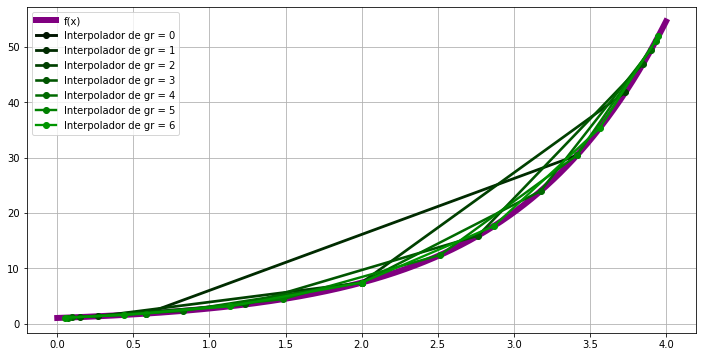

In [ ]:
def f(x):
    return np.e**(x)

x_plot = np.linspace(0, 4, 1000)
plt.plot(x_plot, f(x_plot), label='f(x)', lw=6, color='purple')

for n in range(1, 15):
    z = cheb_zeros(n)  #n ceros de chebyshev
    zeros = domain_change(z, 0, 4)
    interpolador = np.poly1d(np.polyfit(zeros, f(zeros), n-1))
    error = max(abs(f(x_plot)-interpolador(x_plot)))
    color = (0, n / 12.0, 0, 1)
    plt.plot(zeros, interpolador(zeros), marker='o', color= color, label = 'Interpolador de gr = '+str(n-1),lw=3-.1*n)
    #plt.plot(zeros, interpolador(zeros), color=color, lw=0, marker='o', ms=2 +.7*n)
    if error <= 10**(-2):
        print('n =', n, 'error: ', error)
        break

plt.grid()
plt.legend()

## Ejercicio 15

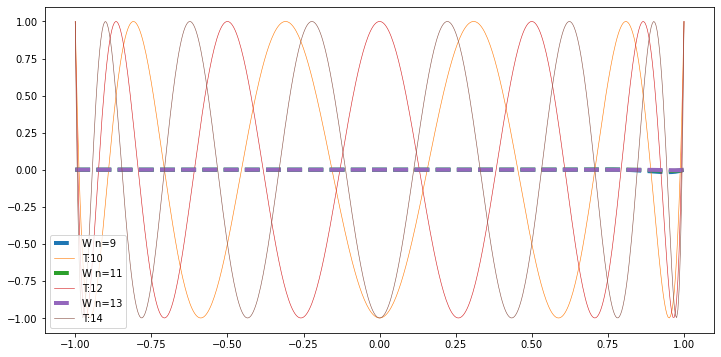

In [8]:
ns = np.array([9, 11, 13])
x_plot = np.linspace(-1, 1, 500)


def x_i(i, n):
    try:
        return -1 + 2*i/n
    except ZeroDivisionError:
        return -1
        
def W(x, n):
    Wval = (x - x_i(0, 0))
    for i in range(n+1):
        Wval = Wval * (x - x_i(i, n))
    return Wval

for n in ns:
    plt.plot(x_plot, W(x_plot, n+1), ls='--', label='W n='+str(n), lw=4)
    plt.plot(x_plot, T(n+1)(x_plot), label='T:' + str(n+1), lw=.6)

plt.legend()

## Ejercicio 16

4.4917364461216636e-07


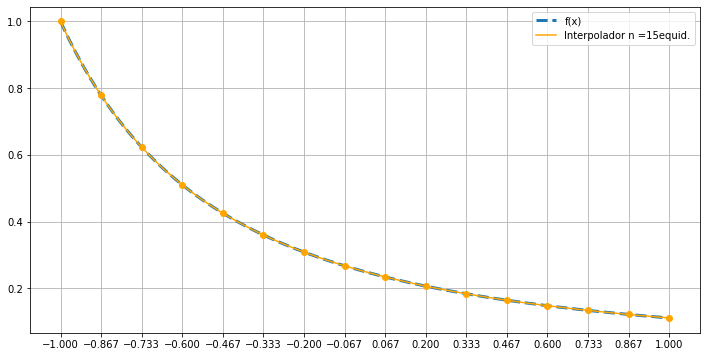

In [ ]:
def f(x):
    return 1/((2+x)**2)

n = 15
x = np.linspace(-1, 1, n+1)
c = np.polyfit(x, f(x), n)
interpolador = np.poly1d(c)

x_plot = np.linspace(-1, 1, 500)

plt.plot(x_plot, f(x_plot), linestyle='--',lw=3, label='f(x)')
plt.plot(x, interpolador(x), lw=0, marker='o', color='orange')
plt.plot(x_plot, interpolador(x_plot),color='orange', label='Interpolador n ='+str(n)+'equid.')
err = max(abs(f(x_plot)-interpolador(x_plot)))
print(err)

plt.xticks(x)
plt.grid()
plt.legend()

5.091025534476046e-08


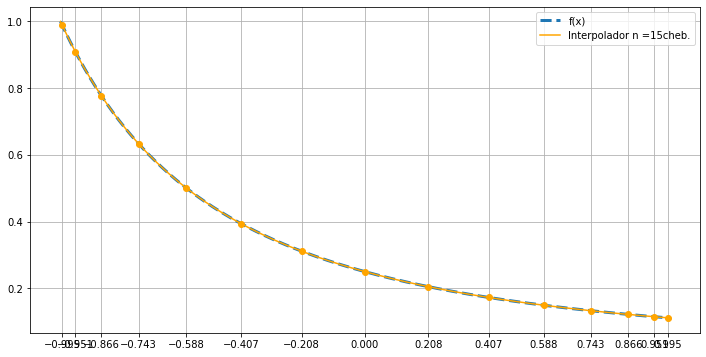

In [ ]:
def f(x):
    return 1/((2+x)**2)

n = 15
x = np.polynomial.chebyshev.chebpts1(n)
c = np.polyfit(x, f(x), n-1)
interpolador = np.poly1d(c)

x_plot = np.linspace(-1, 1, 500)

plt.plot(x_plot, f(x_plot), linestyle='--',lw=3, label='f(x)')
plt.plot(x, interpolador(x), lw=0, marker='o', color='orange')
plt.plot(x_plot, interpolador(x_plot),color='orange', label='Interpolador n ='+ str(n) +'cheb.')
err = max(abs(f(x_plot)-interpolador(x_plot)))
print(err)

plt.xticks(x)
plt.grid()
plt.legend()

## Ejercicio 17


### a)

Error máximo para  2 puntos:  0.7071067811865475
Error máximo para  3 puntos:  0.128085593199313
Error máximo para  4 puntos:  0.016221586055543923
Error máximo para  7 puntos:  7.798442860584842e-06


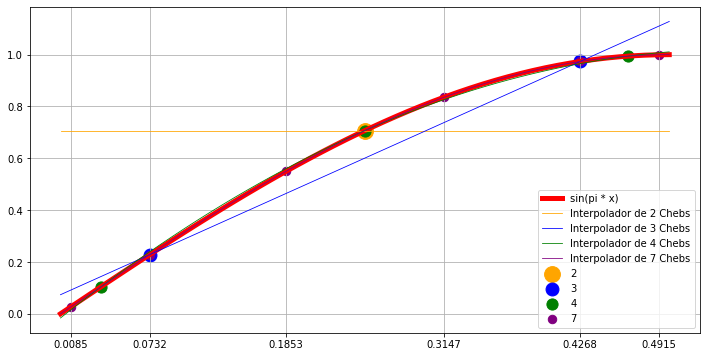

In [ ]:
def f(x):
    return np.sin(np.pi * x)

x_plot = np.linspace(-1, 1, 50)
plt.plot(x_plot, f(x_plot),color='red', label='sin(pi * x)', lw=5)
cols=['orange', 'blue', 'green', 'purple']

for n in [1, 2, 3, 6]:
    zeros = cheb_zeros(n)
    x = domain_change(zeros, 0, 0.5)
    y = f(x)
    p = np.poly1d(np.polyfit(x, y, n-1))
    y_plot = p(x_plot)
    if n==1:
        color = cols[0]
    elif n==2:
        color = cols[1]
    elif n==3:
        color = cols[2]
    else:
        color = cols[3]
    plt.scatter(x, p(x),color= color, marker='o', label=str(n+1), s=500/(n+1))
    plt.plot(x_plot, y_plot, color=color, label='Interpolador de '+str(n+1)+' Chebs', lw=.8)
    error = max(abs(p(x_plot)-f(x_plot)))
    print('Error máximo para ', n+1, 'puntos: ', error)
    plt.xticks(x)

plt.grid()
plt.legend()

### b)

Error máximo para  6 puntos:  0.4018108820332107
Error máximo para  11 puntos:  0.26827023105637426
Error máximo para  16 puntos:  0.0465837604383329


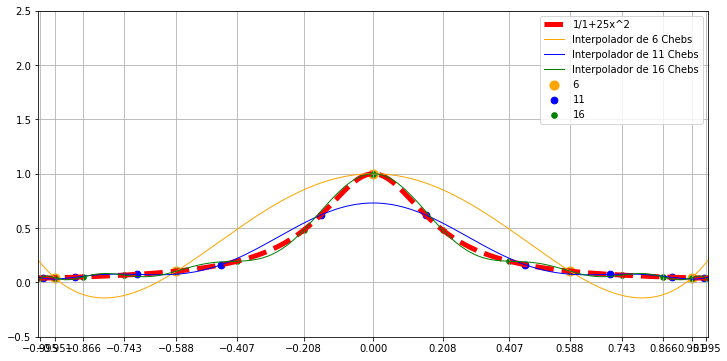

In [ ]:
def f(x):
    return 1/(1 + 25*x**2)

x_plot = np.linspace(-1, 1, 150)
plt.plot(x_plot, f(x_plot), color='red', ls='--', label='1/1+25x^2', lw=5)
plt.ylim(-.5, 2.5)
plt.xlim(-1,1)

for n in [5, 10, 15]:
    x = cheb_zeros(n)
    y = f(x)
    p = np.poly1d(np.polyfit(x, y, n-1))
    y_plot = p(x_plot)
    if n==5:
        color = cols[0]
    elif n==10:
        color = cols[1]
    elif n==15:
        color = cols[2]
    plt.scatter(x, p(x),color= color, marker='o', label=str(n+1), s=500/(n+1))
    plt.plot(x_plot, y_plot, color=color, label='Interpolador de '+str(n+1)+' Chebs', lw=1)
    error = max(abs(p(x_plot)-f(x_plot)))
    print('Error máximo para ', n+1, 'puntos: ', error)
    plt.xticks(x)

plt.grid()
plt.legend()

### c)

Error máximo para  3 puntos:  0.9416232727183985
Error máximo para  10 puntos:  0.07130181533339094
Error máximo para  12 puntos:  0.040907076673650566
Error máximo para  14 puntos:  0.022700445927040847


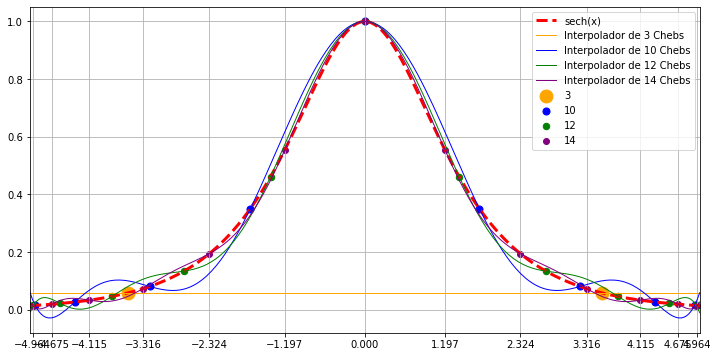

In [ ]:
def f(x):
    return 1/np.cosh(x)

x_plot = np.linspace(-5, 5, 300)
plt.plot(x_plot, f(x_plot), color='red', ls='--', label='sech(x)', lw=3)

plt.xlim(-5,5)

for n in [2, 9, 11, 13]:
    x = cheb_zeros(n)
    x = domain_change(x, -5, 5)
    y = f(x)
    p = np.poly1d(np.polyfit(x, y, n-1))
    y_plot = p(x_plot)
    if n==2:
        color = cols[0]
    elif n==9:
        color = cols[1]
    elif n==11:
        color = cols[2]
    else:
        color= cols[3]
    plt.scatter(x, p(x),color= color, marker='o', label=str(n+1), s=500/(n+1))
    plt.plot(x_plot, y_plot, color=color, label='Interpolador de '+str(n)+' Chebs', lw=1)
    error = max(abs(p(x_plot)-f(x_plot)))
    print('Error máximo para ', n, 'puntos: ', error)
    plt.xticks(x)

plt.grid()
plt.legend()

## Ejercicio 18
...


## Ejercicio 19

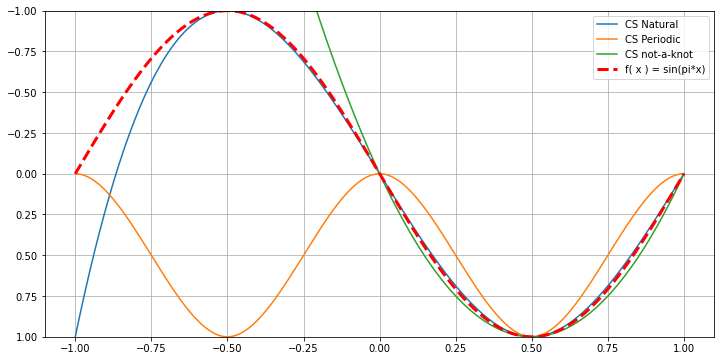

In [ ]:
def f(x):
    return np.sin(np.pi * x)

x_vals = np.array([0, .5, 1])
y_vals = np.array([0, 1, 0])

x_plot = np.linspace(-1, 1, 500)
p = ip.interp1d(x_vals, y_vals, 'linear')
q = ip.CubicSpline(x_vals, y_vals, bc_type='natural')
r = ip.CubicSpline(x_vals, y_vals, bc_type='periodic')
s = ip.CubicSpline(x_vals, y_vals, bc_type='not-a-knot')
plt.plot(x_plot, q(x_plot),  label='CS Natural')
plt.plot(x_plot, r(x_plot),  label='CS Periodic')
plt.plot(x_plot, s(x_plot),  label='CS not-a-knot')
plt.plot(x_plot, f(x_plot), lw=3, ls='--', color='red', label='f( x ) = sin(pi*x)')

plt.ylim(1, -1)
plt.grid()
plt.legend()

## Ejercicio 20

       3        2
-0.07 x + 1.45 x - 7.96 x + 14.68


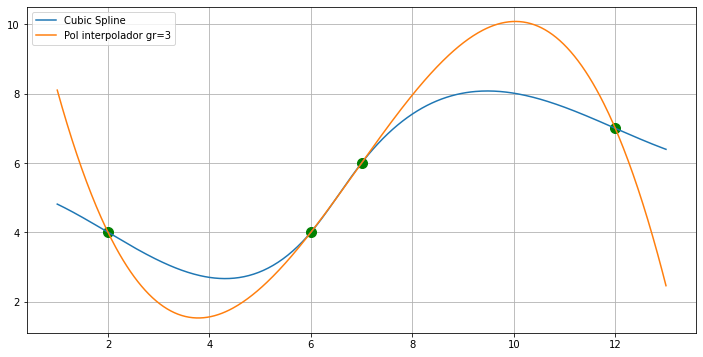

In [ ]:
x_vals = np.array([2, 6, 7, 12])
y_vals = np.array([4, 4, 6, 7])

s = ip.CubicSpline(x_vals, y_vals, bc_type='natural')
p = np.poly1d(np.polyfit(x_vals, y_vals, len(x_vals)-1))

print(p)
x_plot = np.linspace(1, 13, 500)

plt.plot(x_vals, y_vals, lw=0, marker='o', ms=10, color='green')
plt.plot(x_plot, s(x_plot), label='Cubic Spline')
plt.plot(x_plot, p(x_plot), label='Pol interpolador gr=3')

plt.legend()
plt.grid()

## Ejercicio 21

            11             10           9         8         7        6
-1.891e-06 x  + 0.0003638 x  - 0.03137 x + 1.598 x - 53.41 x + 1228 x
              5             4             3             2
 - 1.979e+04 x + 2.234e+05 x - 1.728e+06 x + 8.719e+06 x - 2.58e+07 x + 3.39e+07


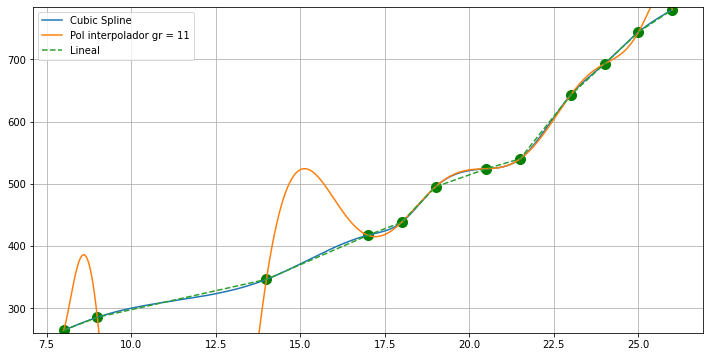

In [ ]:
x_vals = np.array([8, 9, 14, 17, 18, 19, 20.5, 21.5, 23, 24, 25, 26])
y_vals = np.array([264, 285, 346, 417, 438, 495, 524, 540, 643, 693, 744, 780])

s = ip.CubicSpline(x_vals, y_vals, bc_type='natural')
p = np.poly1d(np.polyfit(x_vals, y_vals, len(x_vals)-1))
l = ip.interp1d(x_vals, y_vals, 'linear')

print(p)
x_plot = np.linspace(8, 26, 1000)

plt.plot(x_vals, y_vals, lw=0, marker='o', ms=10, color='green')
plt.plot(x_plot, s(x_plot), label='Cubic Spline')
plt.plot(x_plot, p(x_plot), label='Pol interpolador gr = ' + str(len(x_vals)-1))
plt.plot(x_plot, l(x_plot), ls= '--', label='Lineal')

plt.ylim(260, 785)
plt.legend()
plt.grid()

# Ejercicio 22

## a)

In [ ]:
def trapeciosCompuestos(f, a, b, n):
    x = np.linspace(a, b, n+1)
    h = 1/n
    area = 0
    area = f(x[0]) + f(x[n])
    for k in range(1, n):
        area = area + 2 * f(x[k])
    area = area * h/2
    return area

### b)

In [ ]:
def f(x):
    return 1/x

print(trapeciosCompuestos(f, 1, 4, 6))

0.4684523809523809


In [ ]:
def g(x):
    return 1/(np.sqrt(1+x**2))

print(trapeciosCompuestos(g, 0, 1, 4))

0.8795307704346305


In [ ]:
def q(x):
    return (x**2 + 8)**(1/3)

print(trapeciosCompuestos(q, 0, 1, 6))

2.0274724338172554
